In [1]:
###read the pdb files and compute distances
import os
from biopandas.pdb import PandasPdb
import pandas as pd
directory = r'../structures_without_cat_stem/'
binding_res = {}

for structure in os.listdir(directory):
    res = pd.DataFrame() #initialize a pandas dataframe to store the data
    if structure.endswith(".pdb") : #select pdb files in the directory
        print(structure)
        struct = structure.split('.')[0]
        x = PandasPdb().read_pdb(os.path.join(directory, structure)) #read the pdb file using biopanda and save as a dataframe
        lig_coord = x.df['HETATM'][['x_coord','y_coord','z_coord']] #extract hetatm coordinates, dataframe
        lig_coord_tup = list(lig_coord.itertuples(index=False, name=None)) #convert dataframe into tuple
        for i in lig_coord_tup : #iterate over tuple
            distances = x.distance(xyz=i, records=('ATOM',)) #extract distance from protein atoms w.r.t the coordinates of hetatm's
            all_within_3_5A = x.df['ATOM'][distances <= 3.5] #calculate the distance values within a cut off and save as a dataframe with atom information
            res = pd.concat([res,all_within_3_5A],axis=0) #append the results into a dataframe, so that lines are not overwritten
    else :
        continue
    unique_res = res['residue_number'].unique()
    
    for index in unique_res :
        binding_res[str(struct) + '_' + str(index)] = 1
    

for key in sorted(binding_res.keys()):
    print(key,binding_res[key])

Q9LAK3.pdb
Q92410.pdb
Q10471.pdb
Q8NBL1.pdb
Q9VBZ9.pdb
Q9SWH5.pdb
P15291.pdb
Q91ZW2.pdb
O43173.pdb
O94766.pdb
Q9ES89.pdb
Q9Y2G5.pdb
Q86Y38.pdb
Q09328.pdb
P15907.pdb
Q9LZJ3.pdb
Q02745.pdb
Q10469.pdb
Q8N4A0.pdb
P16442.pdb
Q9P2W7.pdb
Q3U4G3.pdb
Q09324.pdb
O15294.pdb
O15294_498 1
O15294_560 1
O15294_653 1
O15294_694 1
O15294_841 1
O15294_920 1
O15294_921 1
O43173_190 1
O43173_211 1
O43173_213 1
O43173_214 1
O43173_218 1
O43173_246 1
O43173_250 1
O43173_252 1
O43173_298 1
O43173_301 1
O94766_155 1
O94766_156 1
O94766_161 1
O94766_194 1
O94766_227 1
O94766_247 1
O94766_252 1
O94766_253 1
O94766_277 1
O94766_281 1
O94766_308 1
P15291_224 1
P15291_248 1
P15291_276 1
P15291_285 1
P15291_288 1
P15291_310 1
P15291_311 1
P15291_312 1
P15291_313 1
P15291_314 1
P15291_315 1
P15291_355 1
P15291_356 1
P15907_108 1
P15907_112 1
P15907_116 1
P15907_122 1
P15907_212 1
P15907_213 1
P15907_233 1
P15907_236 1
P15907_242 1
P15907_257 1
P15907_259 1
P15907_274 1
P15907_323 1
P15907_354 1
P15907_357 1
P15907_3

In [2]:
binding_res

{'Q9LAK3_2': 1,
 'Q9LAK3_48': 1,
 'Q9LAK3_76': 1,
 'Q9LAK3_78': 1,
 'Q9LAK3_103': 1,
 'Q9LAK3_49': 1,
 'Q9LAK3_50': 1,
 'Q9LAK3_132': 1,
 'Q9LAK3_134': 1,
 'Q9LAK3_135': 1,
 'Q9LAK3_137': 1,
 'Q9LAK3_138': 1,
 'Q9LAK3_139': 1,
 'Q9LAK3_140': 1,
 'Q9LAK3_7': 1,
 'Q9LAK3_185': 1,
 'Q9LAK3_129': 1,
 'Q9LAK3_86': 1,
 'Q9LAK3_53': 1,
 'Q9LAK3_79': 1,
 'Q9LAK3_81': 1,
 'Q9LAK3_51': 1,
 'Q9LAK3_31': 1,
 'Q9LAK3_156': 1,
 'Q9LAK3_32': 1,
 'Q9LAK3_58': 1,
 'Q9LAK3_188': 1,
 'Q92410_280': 1,
 'Q92410_318': 1,
 'Q92410_143': 1,
 'Q92410_145': 1,
 'Q92410_379': 1,
 'Q92410_380': 1,
 'Q92410_381': 1,
 'Q92410_382': 1,
 'Q92410_171': 1,
 'Q10471_359': 1,
 'Q10471_309': 1,
 'Q10471_334': 1,
 'Q10471_332': 1,
 'Q10471_331': 1,
 'Q10471_308': 1,
 'Q10471_208': 1,
 'Q10471_224': 1,
 'Q8NBL1_150': 1,
 'Q8NBL1_276': 1,
 'Q8NBL1_133': 1,
 'Q8NBL1_274': 1,
 'Q8NBL1_275': 1,
 'Q8NBL1_273': 1,
 'Q8NBL1_278': 1,
 'Q9VBZ9_208': 1,
 'Q9VBZ9_210': 1,
 'Q9VBZ9_207': 1,
 'Q9VBZ9_211': 1,
 'Q9VBZ9_145': 1,
 'Q9VBZ9_

In [13]:
#f= open("../physico_chem/binding_res.txt","w+")
#for keys in sorted(binding_res.keys()):
#    f.write(str(keys) + ' : ' + str(binding_res[keys]) + "\n")

In [16]:
#binding_res_1 = {}
#for key in sorted(binding_res.keys()) :
#    if str(key.split('_')[0]) == 'Q8WZA1' :
#        binding_res['Q8WZA1' + '_' + str(key.split('_')[2])] = binding_res.pop(str(key))
#    else :
#        continue
    

IndexError: list index out of range

In [3]:
##read and extract fasta file with a window size 9
from Bio import SeqIO

fragment = {}

for record in SeqIO.parse("../all_seq_without.fasta","fasta"):
    prot_seq = record.seq 
    #print(record.id)
    for j in range(len(prot_seq)-9) : 
        #print(prot_seq[j:j+8], str(j+4))
        fragment[str(record.id.split("|")[1]) + '_' + str(j+5)] = str(prot_seq[j:j+9])

print(fragment)

{'P16442_5': 'MAEVLRTLA', 'P16442_6': 'AEVLRTLAG', 'P16442_7': 'EVLRTLAGK', 'P16442_8': 'VLRTLAGKP', 'P16442_9': 'LRTLAGKPK', 'P16442_10': 'RTLAGKPKC', 'P16442_11': 'TLAGKPKCH', 'P16442_12': 'LAGKPKCHA', 'P16442_13': 'AGKPKCHAL', 'P16442_14': 'GKPKCHALR', 'P16442_15': 'KPKCHALRP', 'P16442_16': 'PKCHALRPM', 'P16442_17': 'KCHALRPMI', 'P16442_18': 'CHALRPMIL', 'P16442_19': 'HALRPMILF', 'P16442_20': 'ALRPMILFL', 'P16442_21': 'LRPMILFLI', 'P16442_22': 'RPMILFLIM', 'P16442_23': 'PMILFLIML', 'P16442_24': 'MILFLIMLV', 'P16442_25': 'ILFLIMLVL', 'P16442_26': 'LFLIMLVLV', 'P16442_27': 'FLIMLVLVL', 'P16442_28': 'LIMLVLVLF', 'P16442_29': 'IMLVLVLFG', 'P16442_30': 'MLVLVLFGY', 'P16442_31': 'LVLVLFGYG', 'P16442_32': 'VLVLFGYGV', 'P16442_33': 'LVLFGYGVL', 'P16442_34': 'VLFGYGVLS', 'P16442_35': 'LFGYGVLSP', 'P16442_36': 'FGYGVLSPR', 'P16442_37': 'GYGVLSPRS', 'P16442_38': 'YGVLSPRSL', 'P16442_39': 'GVLSPRSLM', 'P16442_40': 'VLSPRSLMP', 'P16442_41': 'LSPRSLMPG', 'P16442_42': 'SPRSLMPGS', 'P16442_43': 'PR

In [4]:
#create positive & negative dataset
positive = {}
negative = {}

for key in sorted(fragment.keys()) :
    if key in binding_res:
        binding_res[key] = binding_res[key]
    else:
        binding_res[key] = 0

In [37]:
f= open("../physico_chem/pos_neg.csv","w+")
f_1 = open("../physico_chem/pos_neg_seq.txt","w+")
import pandas as pd

for key in sorted(fragment.keys()):
    f.write(str(key) + ' , ' + str(fragment[key]) + ' , ' + str(binding_res[key]) + '\n')
    f_1.write(str(fragment[key]) + '\n')
    print(key, fragment[key], binding_res[key])
    print(fragment[key])

O15294_10 KRMLSFQGL 0
KRMLSFQGL
O15294_100 QEAIEHYRH 0
QEAIEHYRH
O15294_1000 LFNTKQYTM 0
LFNTKQYTM
O15294_1001 FNTKQYTME 0
FNTKQYTME
O15294_1002 NTKQYTMEL 0
NTKQYTMEL
O15294_1003 TKQYTMELE 0
TKQYTMELE
O15294_1004 KQYTMELER 0
KQYTMELER
O15294_1005 QYTMELERL 0
QYTMELERL
O15294_1006 YTMELERLY 0
YTMELERLY
O15294_1007 TMELERLYL 0
TMELERLYL
O15294_1008 MELERLYLQ 0
MELERLYLQ
O15294_1009 ELERLYLQM 0
ELERLYLQM
O15294_101 EAIEHYRHA 0
EAIEHYRHA
O15294_1010 LERLYLQMW 0
LERLYLQMW
O15294_1011 ERLYLQMWE 0
ERLYLQMWE
O15294_1012 RLYLQMWEH 0
RLYLQMWEH
O15294_1013 LYLQMWEHY 0
LYLQMWEHY
O15294_1014 YLQMWEHYA 0
YLQMWEHYA
O15294_1015 LQMWEHYAA 0
LQMWEHYAA
O15294_1016 QMWEHYAAG 0
QMWEHYAAG
O15294_1017 MWEHYAAGN 0
MWEHYAAGN
O15294_1018 WEHYAAGNK 0
WEHYAAGNK
O15294_1019 EHYAAGNKP 0
EHYAAGNKP
O15294_102 AIEHYRHAL 0
AIEHYRHAL
O15294_1020 HYAAGNKPD 0
HYAAGNKPD
O15294_1021 YAAGNKPDH 0
YAAGNKPDH
O15294_1022 AAGNKPDHM 0
AAGNKPDHM
O15294_1023 AGNKPDHMI 0
AGNKPDHMI
O15294_1024 GNKPDHMIK 0
GNKPDHMIK
O15294_1025 NKPDHMI

O15294_68 SAHFSTLAI 0
SAHFSTLAI
O15294_680 AEVAEQYSE 0
AEVAEQYSE
O15294_681 EVAEQYSEK 0
EVAEQYSEK
O15294_682 VAEQYSEKL 0
VAEQYSEKL
O15294_683 AEQYSEKLA 0
AEQYSEKLA
O15294_684 EQYSEKLAY 0
EQYSEKLAY
O15294_685 QYSEKLAYM 0
QYSEKLAYM
O15294_686 YSEKLAYMP 0
YSEKLAYMP
O15294_687 SEKLAYMPH 0
SEKLAYMPH
O15294_688 EKLAYMPHT 0
EKLAYMPHT
O15294_689 KLAYMPHTF 0
KLAYMPHTF
O15294_69 AHFSTLAIK 0
AHFSTLAIK
O15294_690 LAYMPHTFF 0
LAYMPHTFF
O15294_691 AYMPHTFFI 0
AYMPHTFFI
O15294_692 YMPHTFFIG 0
YMPHTFFIG
O15294_693 MPHTFFIGD 0
MPHTFFIGD
O15294_694 PHTFFIGDH 1
PHTFFIGDH
O15294_695 HTFFIGDHA 0
HTFFIGDHA
O15294_696 TFFIGDHAN 0
TFFIGDHAN
O15294_697 FFIGDHANM 0
FFIGDHANM
O15294_698 FIGDHANMF 0
FIGDHANMF
O15294_699 IGDHANMFP 0
IGDHANMFP
O15294_7 EPTKRMLSF 0
EPTKRMLSF
O15294_70 HFSTLAIKQ 0
HFSTLAIKQ
O15294_700 GDHANMFPH 0
GDHANMFPH
O15294_701 DHANMFPHL 0
DHANMFPHL
O15294_702 HANMFPHLK 0
HANMFPHLK
O15294_703 ANMFPHLKK 0
ANMFPHLKK
O15294_704 NMFPHLKKK 0
NMFPHLKKK
O15294_705 MFPHLKKKA 0
MFPHLKKKA
O15294_706 FPHL

O94766_121 PTPLVSGLL 0
PTPLVSGLL
O94766_122 TPLVSGLLA 0
TPLVSGLLA
O94766_123 PLVSGLLAA 0
PLVSGLLAA
O94766_124 LVSGLLAAS 0
LVSGLLAAS
O94766_125 VSGLLAASG 0
VSGLLAASG
O94766_126 SGLLAASGL 0
SGLLAASGL
O94766_127 GLLAASGLL 0
GLLAASGLL
O94766_128 LLAASGLLF 0
LLAASGLLF
O94766_129 LAASGLLFT 0
LAASGLLFT
O94766_13 FLAYFLVSI 0
FLAYFLVSI
O94766_130 AASGLLFTH 0
AASGLLFTH
O94766_131 ASGLLFTHL 0
ASGLLFTHL
O94766_132 SGLLFTHLV 0
SGLLFTHLV
O94766_133 GLLFTHLVV 0
GLLFTHLVV
O94766_134 LLFTHLVVL 0
LLFTHLVVL
O94766_135 LFTHLVVLT 0
LFTHLVVLT
O94766_136 FTHLVVLTP 0
FTHLVVLTP
O94766_137 THLVVLTPK 0
THLVVLTPK
O94766_138 HLVVLTPKA 0
HLVVLTPKA
O94766_139 LVVLTPKAQ 0
LVVLTPKAQ
O94766_14 LAYFLVSIA 0
LAYFLVSIA
O94766_140 VVLTPKAQR 0
VVLTPKAQR
O94766_141 VLTPKAQRL 0
VLTPKAQRL
O94766_142 LTPKAQRLR 0
LTPKAQRLR
O94766_143 TPKAQRLRE 0
TPKAQRLRE
O94766_144 PKAQRLREG 0
PKAQRLREG
O94766_145 KAQRLREGE 0
KAQRLREGE
O94766_146 AQRLREGEP 0
AQRLREGEP
O94766_147 QRLREGEPG 0
QRLREGEPG
O94766_148 RLREGEPGW 0
RLREGEPGW
O94766_149 L

YHSDIPKWY
P15907_267 HSDIPKWYQ 0
HSDIPKWYQ
P15907_268 SDIPKWYQN 0
SDIPKWYQN
P15907_269 DIPKWYQNP 0
DIPKWYQNP
P15907_27 ICVWKEKKK 0
ICVWKEKKK
P15907_270 IPKWYQNPD 0
IPKWYQNPD
P15907_271 PKWYQNPDY 0
PKWYQNPDY
P15907_272 KWYQNPDYN 0
KWYQNPDYN
P15907_273 WYQNPDYNF 0
WYQNPDYNF
P15907_274 YQNPDYNFF 1
YQNPDYNFF
P15907_275 QNPDYNFFN 0
QNPDYNFFN
P15907_276 NPDYNFFNN 0
NPDYNFFNN
P15907_277 PDYNFFNNY 0
PDYNFFNNY
P15907_278 DYNFFNNYK 0
DYNFFNNYK
P15907_279 YNFFNNYKT 0
YNFFNNYKT
P15907_28 CVWKEKKKG 0
CVWKEKKKG
P15907_280 NFFNNYKTY 0
NFFNNYKTY
P15907_281 FFNNYKTYR 0
FFNNYKTYR
P15907_282 FNNYKTYRK 0
FNNYKTYRK
P15907_283 NNYKTYRKL 0
NNYKTYRKL
P15907_284 NYKTYRKLH 0
NYKTYRKLH
P15907_285 YKTYRKLHP 0
YKTYRKLHP
P15907_286 KTYRKLHPN 0
KTYRKLHPN
P15907_287 TYRKLHPNQ 0
TYRKLHPNQ
P15907_288 YRKLHPNQP 0
YRKLHPNQP
P15907_289 RKLHPNQPF 0
RKLHPNQPF
P15907_29 VWKEKKKGS 0
VWKEKKKGS
P15907_290 KLHPNQPFY 0
KLHPNQPFY
P15907_291 LHPNQPFYI 0
LHPNQPFYI
P15907_292 HPNQPFYIL 0
HPNQPFYIL
P15907_293 PNQPFYILK 0
PNQPFYILK
P15

ERFNRSMQP
Q02745_84 RFNRSMQPL 1
RFNRSMQPL
Q02745_85 FNRSMQPLL 0
FNRSMQPLL
Q02745_86 NRSMQPLLT 1
NRSMQPLLT
Q02745_87 RSMQPLLTA 0
RSMQPLLTA
Q02745_88 SMQPLLTAK 0
SMQPLLTAK
Q02745_89 MQPLLTAKN 0
MQPLLTAKN
Q02745_9 RKKSTLKLL 0
RKKSTLKLL
Q02745_90 QPLLTAKNA 0
QPLLTAKNA
Q02745_91 PLLTAKNAH 0
PLLTAKNAH
Q02745_92 LLTAKNAHL 0
LLTAKNAHL
Q02745_93 LTAKNAHLE 0
LTAKNAHLE
Q02745_94 TAKNAHLEE 0
TAKNAHLEE
Q02745_95 AKNAHLEED 0
AKNAHLEED
Q02745_96 KNAHLEEDT 0
KNAHLEEDT
Q02745_97 NAHLEEDTY 0
NAHLEEDTY
Q02745_98 AHLEEDTYK 0
AHLEEDTYK
Q02745_99 HLEEDTYKW 0
HLEEDTYKW
Q09324_10 FRRRLFSCP 0
FRRRLFSCP
Q09324_100 MTRDCASFI 0
MTRDCASFI
Q09324_101 TRDCASFIR 0
TRDCASFIR
Q09324_102 RDCASFIRT 0
RDCASFIRT
Q09324_103 DCASFIRTR 0
DCASFIRTR
Q09324_104 CASFIRTRK 0
CASFIRTRK
Q09324_105 ASFIRTRKY 0
ASFIRTRKY
Q09324_106 SFIRTRKYI 0
SFIRTRKYI
Q09324_107 FIRTRKYIV 0
FIRTRKYIV
Q09324_108 IRTRKYIVE 0
IRTRKYIVE
Q09324_109 RTRKYIVEP 0
RTRKYIVEP
Q09324_11 RRRLFSCPT 0
RRRLFSCPT
Q09324_110 TRKYIVEPL 0
TRKYIVEPL
Q09324_111 RKYIVEPLT

Q09328_498 HGILSGRDL 0
HGILSGRDL
Q09328_499 GILSGRDLQ 0
GILSGRDLQ
Q09328_5 MALFTPWKL 0
MALFTPWKL
Q09328_50 LREQILDLS 0
LREQILDLS
Q09328_500 ILSGRDLQF 0
ILSGRDLQF
Q09328_501 LSGRDLQFL 0
LSGRDLQFL
Q09328_502 SGRDLQFLL 0
SGRDLQFLL
Q09328_503 GRDLQFLLR 0
GRDLQFLLR
Q09328_504 RDLQFLLRE 0
RDLQFLLRE
Q09328_505 DLQFLLRET 0
DLQFLLRET
Q09328_506 LQFLLRETK 0
LQFLLRETK
Q09328_507 QFLLRETKL 0
QFLLRETKL
Q09328_508 FLLRETKLF 0
FLLRETKLF
Q09328_509 LLRETKLFV 0
LLRETKLFV
Q09328_51 REQILDLSK 0
REQILDLSK
Q09328_510 LRETKLFVG 0
LRETKLFVG
Q09328_511 RETKLFVGL 0
RETKLFVGL
Q09328_512 ETKLFVGLG 0
ETKLFVGLG
Q09328_513 TKLFVGLGF 0
TKLFVGLGF
Q09328_514 KLFVGLGFP 0
KLFVGLGFP
Q09328_515 LFVGLGFPY 0
LFVGLGFPY
Q09328_516 FVGLGFPYE 0
FVGLGFPYE
Q09328_517 VGLGFPYEG 0
VGLGFPYEG
Q09328_518 GLGFPYEGP 0
GLGFPYEGP
Q09328_519 LGFPYEGPA 1
LGFPYEGPA
Q09328_52 EQILDLSKR 0
EQILDLSKR
Q09328_520 GFPYEGPAP 1
GFPYEGPAP
Q09328_521 FPYEGPAPL 1
FPYEGPAPL
Q09328_522 PYEGPAPLE 1
PYEGPAPLE
Q09328_523 YEGPAPLEA 0
YEGPAPLEA
Q09328_524 EGPA

Q10471_23 IAYYMYSGG 0
IAYYMYSGG
Q10471_230 HCECNEHWL 0
HCECNEHWL
Q10471_231 CECNEHWLE 0
CECNEHWLE
Q10471_232 ECNEHWLEP 0
ECNEHWLEP
Q10471_233 CNEHWLEPL 0
CNEHWLEPL
Q10471_234 NEHWLEPLL 0
NEHWLEPLL
Q10471_235 EHWLEPLLE 0
EHWLEPLLE
Q10471_236 HWLEPLLER 0
HWLEPLLER
Q10471_237 WLEPLLERV 0
WLEPLLERV
Q10471_238 LEPLLERVA 0
LEPLLERVA
Q10471_239 EPLLERVAE 0
EPLLERVAE
Q10471_24 AYYMYSGGG 0
AYYMYSGGG
Q10471_240 PLLERVAED 0
PLLERVAED
Q10471_241 LLERVAEDR 0
LLERVAEDR
Q10471_242 LERVAEDRT 0
LERVAEDRT
Q10471_243 ERVAEDRTR 0
ERVAEDRTR
Q10471_244 RVAEDRTRV 0
RVAEDRTRV
Q10471_245 VAEDRTRVV 0
VAEDRTRVV
Q10471_246 AEDRTRVVS 0
AEDRTRVVS
Q10471_247 EDRTRVVSP 0
EDRTRVVSP
Q10471_248 DRTRVVSPI 0
DRTRVVSPI
Q10471_249 RTRVVSPII 0
RTRVVSPII
Q10471_25 YYMYSGGGS 0
YYMYSGGGS
Q10471_250 TRVVSPIID 0
TRVVSPIID
Q10471_251 RVVSPIIDV 0
RVVSPIIDV
Q10471_252 VVSPIIDVI 0
VVSPIIDVI
Q10471_253 VSPIIDVIN 0
VSPIIDVIN
Q10471_254 SPIIDVINM 0
SPIIDVINM
Q10471_255 PIIDVINMD 0
PIIDVINMD
Q10471_256 IIDVINMDN 0
IIDVINMDN
Q10471_257 ID

Q3U4G3_52 FSSATKRLK 0
FSSATKRLK
Q3U4G3_53 SSATKRLKE 0
SSATKRLKE
Q3U4G3_54 SATKRLKEA 0
SATKRLKEA
Q3U4G3_55 ATKRLKEAR 0
ATKRLKEAR
Q3U4G3_56 TKRLKEARA 0
TKRLKEARA
Q3U4G3_57 KRLKEARAG 0
KRLKEARAG
Q3U4G3_58 RLKEARAGA 0
RLKEARAGA
Q3U4G3_59 LKEARAGAA 0
LKEARAGAA
Q3U4G3_6 GLLRGGAAC 0
GLLRGGAAC
Q3U4G3_60 KEARAGAAA 0
KEARAGAAA
Q3U4G3_61 EARAGAAAP 0
EARAGAAAP
Q3U4G3_62 ARAGAAAPT 0
ARAGAAAPT
Q3U4G3_63 RAGAAAPTP 0
RAGAAAPTP
Q3U4G3_64 AGAAAPTPP 0
AGAAAPTPP
Q3U4G3_65 GAAAPTPPA 0
GAAAPTPPA
Q3U4G3_66 AAAPTPPAP 0
AAAPTPPAP
Q3U4G3_67 AAPTPPAPE 0
AAPTPPAPE
Q3U4G3_68 APTPPAPEL 0
APTPPAPEL
Q3U4G3_69 PTPPAPELA 0
PTPPAPELA
Q3U4G3_7 LLRGGAACA 0
LLRGGAACA
Q3U4G3_70 TPPAPELAR 0
TPPAPELAR
Q3U4G3_71 PPAPELARG 0
PPAPELARG
Q3U4G3_72 PAPELARGS 0
PAPELARGS
Q3U4G3_73 APELARGSA 0
APELARGSA
Q3U4G3_74 PELARGSAA 0
PELARGSAA
Q3U4G3_75 ELARGSAAP 0
ELARGSAAP
Q3U4G3_76 LARGSAAPA 0
LARGSAAPA
Q3U4G3_77 ARGSAAPAS 0
ARGSAAPAS
Q3U4G3_78 RGSAAPASG 0
RGSAAPASG
Q3U4G3_79 GSAAPASGA 0
GSAAPASGA
Q3U4G3_8 LRGGAACAR 0
LRGGAACAR
Q3U4G3_80 S

Q86Y38_98 QARARGGGP 0
QARARGGGP
Q86Y38_99 ARARGGGPG 0
ARARGGGPG
Q8N4A0_10 TWAGKSCLL 0
TWAGKSCLL
Q8N4A0_100 LIERYAINI 0
LIERYAINI
Q8N4A0_101 IERYAINIY 0
IERYAINIY
Q8N4A0_102 ERYAINIYL 0
ERYAINIYL
Q8N4A0_103 RYAINIYLS 0
RYAINIYLS
Q8N4A0_104 YAINIYLSD 0
YAINIYLSD
Q8N4A0_105 AINIYLSDR 0
AINIYLSDR
Q8N4A0_106 INIYLSDRI 0
INIYLSDRI
Q8N4A0_107 NIYLSDRIS 0
NIYLSDRIS
Q8N4A0_108 IYLSDRISL 0
IYLSDRISL
Q8N4A0_109 YLSDRISLH 0
YLSDRISLH
Q8N4A0_11 WAGKSCLLL 0
WAGKSCLLL
Q8N4A0_110 LSDRISLHR 0
LSDRISLHR
Q8N4A0_111 SDRISLHRH 0
SDRISLHRH
Q8N4A0_112 DRISLHRHI 0
DRISLHRHI
Q8N4A0_113 RISLHRHIE 0
RISLHRHIE
Q8N4A0_114 ISLHRHIED 0
ISLHRHIED
Q8N4A0_115 SLHRHIEDK 0
SLHRHIEDK
Q8N4A0_116 LHRHIEDKR 0
LHRHIEDKR
Q8N4A0_117 HRHIEDKRM 0
HRHIEDKRM
Q8N4A0_118 RHIEDKRMY 0
RHIEDKRMY
Q8N4A0_119 HIEDKRMYE 0
HIEDKRMYE
Q8N4A0_12 AGKSCLLLA 0
AGKSCLLLA
Q8N4A0_120 IEDKRMYEC 0
IEDKRMYEC
Q8N4A0_121 EDKRMYECK 0
EDKRMYECK
Q8N4A0_122 DKRMYECKS 0
DKRMYECKS
Q8N4A0_123 KRMYECKSQ 0
KRMYECKSQ
Q8N4A0_124 RMYECKSQK 0
RMYECKSQK
Q8N4A0_125 MYEC

Q8NBL1_376 YNVTRRKGY 0
YNVTRRKGY
Q8NBL1_377 NVTRRKGYD 0
NVTRRKGYD
Q8NBL1_378 VTRRKGYDQ 0
VTRRKGYDQ
Q8NBL1_379 TRRKGYDQI 0
TRRKGYDQI
Q8NBL1_38 VFIDQINRS 0
VFIDQINRS
Q8NBL1_380 RRKGYDQII 0
RRKGYDQII
Q8NBL1_381 RKGYDQIIP 0
RKGYDQIIP
Q8NBL1_382 KGYDQIIPK 0
KGYDQIIPK
Q8NBL1_383 GYDQIIPKM 0
GYDQIIPKM
Q8NBL1_384 YDQIIPKML 0
YDQIIPKML
Q8NBL1_385 DQIIPKMLK 0
DQIIPKMLK
Q8NBL1_386 QIIPKMLKT 0
QIIPKMLKT
Q8NBL1_387 IIPKMLKTE 0
IIPKMLKTE
Q8NBL1_39 FIDQINRSL 0
FIDQINRSL
Q8NBL1_40 IDQINRSLE 0
IDQINRSLE
Q8NBL1_41 DQINRSLEN 0
DQINRSLEN
Q8NBL1_42 QINRSLENY 0
QINRSLENY
Q8NBL1_43 INRSLENYE 0
INRSLENYE
Q8NBL1_44 NRSLENYEP 0
NRSLENYEP
Q8NBL1_45 RSLENYEPC 0
RSLENYEPC
Q8NBL1_46 SLENYEPCS 0
SLENYEPCS
Q8NBL1_47 LENYEPCSS 0
LENYEPCSS
Q8NBL1_48 ENYEPCSSQ 0
ENYEPCSSQ
Q8NBL1_49 NYEPCSSQN 0
NYEPCSSQN
Q8NBL1_5 MEWWASSPL 0
MEWWASSPL
Q8NBL1_50 YEPCSSQNC 0
YEPCSSQNC
Q8NBL1_51 EPCSSQNCS 0
EPCSSQNCS
Q8NBL1_52 PCSSQNCSC 0
PCSSQNCSC
Q8NBL1_53 CSSQNCSCY 0
CSSQNCSCY
Q8NBL1_54 SSQNCSCYH 0
SSQNCSCYH
Q8NBL1_55 SQNCSCYHG 0
SQNCSCY

Q92410_48 TTEFQWYGW 0
TTEFQWYGW
Q92410_49 TEFQWYGWP 0
TEFQWYGWP
Q92410_5 MVQGKVLVV 0
MVQGKVLVV
Q92410_50 EFQWYGWPG 0
EFQWYGWPG
Q92410_51 FQWYGWPGL 0
FQWYGWPGL
Q92410_52 QWYGWPGLE 0
QWYGWPGLE
Q92410_53 WYGWPGLEI 0
WYGWPGLEI
Q92410_54 YGWPGLEIP 0
YGWPGLEIP
Q92410_55 GWPGLEIPE 0
GWPGLEIPE
Q92410_56 WPGLEIPED 0
WPGLEIPED
Q92410_57 PGLEIPEDE 0
PGLEIPEDE
Q92410_58 GLEIPEDEQ 0
GLEIPEDEQ
Q92410_59 LEIPEDEQT 0
LEIPEDEQT
Q92410_6 VQGKVLVVS 0
VQGKVLVVS
Q92410_60 EIPEDEQTK 0
EIPEDEQTK
Q92410_61 IPEDEQTKV 0
IPEDEQTKV
Q92410_62 PEDEQTKVN 0
PEDEQTKVN
Q92410_63 EDEQTKVND 0
EDEQTKVND
Q92410_64 DEQTKVNDE 0
DEQTKVNDE
Q92410_65 EQTKVNDEL 0
EQTKVNDEL
Q92410_66 QTKVNDELK 0
QTKVNDELK
Q92410_67 TKVNDELKS 0
TKVNDELKS
Q92410_68 KVNDELKSK 0
KVNDELKSK
Q92410_69 VNDELKSKF 0
VNDELKSKF
Q92410_7 QGKVLVVSN 0
QGKVLVVSN
Q92410_70 NDELKSKFN 0
NDELKSKFN
Q92410_71 DELKSKFNC 0
DELKSKFNC
Q92410_72 ELKSKFNCT 0
ELKSKFNCT
Q92410_73 LKSKFNCTA 0
LKSKFNCTA
Q92410_74 KSKFNCTAI 0
KSKFNCTAI
Q92410_75 SKFNCTAIF 0
SKFNCTAIF
Q92410_76 K

MGPKGKIRE
Q9LZJ3_295 GPKGKIREE 0
GPKGKIREE
Q9LZJ3_296 PKGKIREEA 0
PKGKIREEA
Q9LZJ3_297 KGKIREEAG 0
KGKIREEAG
Q9LZJ3_298 GKIREEAGK 0
GKIREEAGK
Q9LZJ3_299 KIREEAGKV 0
KIREEAGKV
Q9LZJ3_30 LCLVLTVIV 0
LCLVLTVIV
Q9LZJ3_300 IREEAGKVL 0
IREEAGKVL
Q9LZJ3_301 REEAGKVLT 0
REEAGKVLT
Q9LZJ3_302 EEAGKVLTR 0
EEAGKVLTR
Q9LZJ3_303 EAGKVLTRE 0
EAGKVLTRE
Q9LZJ3_304 AGKVLTREL 0
AGKVLTREL
Q9LZJ3_305 GKVLTRELK 0
GKVLTRELK
Q9LZJ3_306 KVLTRELKD 0
KVLTRELKD
Q9LZJ3_307 VLTRELKDR 0
VLTRELKDR
Q9LZJ3_308 LTRELKDRP 0
LTRELKDRP
Q9LZJ3_309 TRELKDRPA 0
TRELKDRPA
Q9LZJ3_31 CLVLTVIVL 0
CLVLTVIVL
Q9LZJ3_310 RELKDRPAF 0
RELKDRPAF
Q9LZJ3_311 ELKDRPAFE 0
ELKDRPAFE
Q9LZJ3_312 LKDRPAFEA 0
LKDRPAFEA
Q9LZJ3_313 KDRPAFEAD 0
KDRPAFEAD
Q9LZJ3_314 DRPAFEADD 0
DRPAFEADD
Q9LZJ3_315 RPAFEADDQ 0
RPAFEADDQ
Q9LZJ3_316 PAFEADDQS 0
PAFEADDQS
Q9LZJ3_317 AFEADDQSA 0
AFEADDQSA
Q9LZJ3_318 FEADDQSAM 1
FEADDQSAM
Q9LZJ3_319 EADDQSAMV 0
EADDQSAMV
Q9LZJ3_32 LVLTVIVLR 0
LVLTVIVLR
Q9LZJ3_320 ADDQSAMVY 0
ADDQSAMVY
Q9LZJ3_321 DDQSAMVYL 0
DDQSAMVYL
Q9L

DQISSCTQK
Q9SWH5_385 QISSCTQKE 0
QISSCTQKE
Q9SWH5_386 ISSCTQKEK 0
ISSCTQKEK
Q9SWH5_387 SSCTQKEKL 0
SSCTQKEKL
Q9SWH5_388 SCTQKEKLL 0
SCTQKEKLL
Q9SWH5_389 CTQKEKLLP 0
CTQKEKLLP
Q9SWH5_39 SSGTMKLTR 0
SSGTMKLTR
Q9SWH5_390 TQKEKLLPE 0
TQKEKLLPE
Q9SWH5_391 QKEKLLPEV 0
QKEKLLPEV
Q9SWH5_392 KEKLLPEVD 0
KEKLLPEVD
Q9SWH5_393 EKLLPEVDT 0
EKLLPEVDT
Q9SWH5_394 KLLPEVDTL 0
KLLPEVDTL
Q9SWH5_395 LLPEVDTLV 0
LLPEVDTLV
Q9SWH5_396 LPEVDTLVE 0
LPEVDTLVE
Q9SWH5_397 PEVDTLVER 0
PEVDTLVER
Q9SWH5_398 EVDTLVERS 0
EVDTLVERS
Q9SWH5_399 VDTLVERSR 0
VDTLVERSR
Q9SWH5_40 SGTMKLTRT 0
SGTMKLTRT
Q9SWH5_400 DTLVERSRH 0
DTLVERSRH
Q9SWH5_401 TLVERSRHV 0
TLVERSRHV
Q9SWH5_402 LVERSRHVN 0
LVERSRHVN
Q9SWH5_403 VERSRHVNT 0
VERSRHVNT
Q9SWH5_404 ERSRHVNTP 0
ERSRHVNTP
Q9SWH5_405 RSRHVNTPK 0
RSRHVNTPK
Q9SWH5_406 SRHVNTPKH 0
SRHVNTPKH
Q9SWH5_407 RHVNTPKHK 0
RHVNTPKHK
Q9SWH5_408 HVNTPKHKA 0
HVNTPKHKA
Q9SWH5_409 VNTPKHKAV 0
VNTPKHKAV
Q9SWH5_41 GTMKLTRTF 0
GTMKLTRTF
Q9SWH5_410 NTPKHKAVL 0
NTPKHKAVL
Q9SWH5_411 TPKHKAVLV 0
TPKHKAVLV
Q9S

Q9Y2G5_396 RIHEEREIL 0
RIHEEREIL
Q9Y2G5_397 IHEEREILG 0
IHEEREILG
Q9Y2G5_398 HEEREILGL 0
HEEREILGL
Q9Y2G5_399 EEREILGLD 0
EEREILGLD
Q9Y2G5_40 LSGAASRRR 0
LSGAASRRR
Q9Y2G5_400 EREILGLDP 0
EREILGLDP
Q9Y2G5_401 REILGLDPK 0
REILGLDPK
Q9Y2G5_402 EILGLDPKT 0
EILGLDPKT
Q9Y2G5_403 ILGLDPKTT 0
ILGLDPKTT
Q9Y2G5_404 LGLDPKTTY 0
LGLDPKTTY
Q9Y2G5_405 GLDPKTTYN 0
GLDPKTTYN
Q9Y2G5_406 LDPKTTYNR 0
LDPKTTYNR
Q9Y2G5_407 DPKTTYNRF 0
DPKTTYNRF
Q9Y2G5_408 PKTTYNRFC 0
PKTTYNRFC
Q9Y2G5_409 KTTYNRFCG 0
KTTYNRFCG
Q9Y2G5_41 SGAASRRRY 0
SGAASRRRY
Q9Y2G5_410 TTYNRFCGD 0
TTYNRFCGD
Q9Y2G5_411 TYNRFCGDQ 0
TYNRFCGDQ
Q9Y2G5_412 YNRFCGDQE 0
YNRFCGDQE
Q9Y2G5_413 NRFCGDQEK 0
NRFCGDQEK
Q9Y2G5_414 RFCGDQEKA 0
RFCGDQEKA
Q9Y2G5_415 FCGDQEKAC 0
FCGDQEKAC
Q9Y2G5_416 CGDQEKACE 0
CGDQEKACE
Q9Y2G5_417 GDQEKACEQ 0
GDQEKACEQ
Q9Y2G5_418 DQEKACEQP 0
DQEKACEQP
Q9Y2G5_419 QEKACEQPT 0
QEKACEQPT
Q9Y2G5_42 GAASRRRYL 0
GAASRRRYL
Q9Y2G5_420 EKACEQPTH 0
EKACEQPTH
Q9Y2G5_421 KACEQPTHW 0
KACEQPTHW
Q9Y2G5_422 ACEQPTHWK 0
ACEQPTHWK
Q9Y2G5_423 CE

In [5]:
pos_neg = pd.read_csv('../physico_chem/pos_neg.csv', header=None)
pos_neg

,0,1,2
0,O15294_10,KRMLSFQGL,0
1,O15294_100,QEAIEHYRH,0
2,O15294_1000,LFNTKQYTM,0
3,O15294_1001,FNTKQYTME,0
4,O15294_1002,NTKQYTMEL,0
...,...,...,...
11134,Q9Y2G5_95,HWQSPDIHQ,0
11135,Q9Y2G5_96,WQSPDIHQV,0
11136,Q9Y2G5_97,QSPDIHQVR,0
11137,Q9Y2G5_98,SPDIHQVRI,0


In [7]:
feature_1 = pd.read_csv('../physico_chem/1/Seq2Feature/out_protein/normalizedValues_avg_prop_change_AAP.csv')
feature_2 = pd.read_csv('../physico_chem/2/Seq2Feature/out_protein/normalizedValues_avg_prop_change_AAP.csv')
feature_3 = pd.read_csv('../physico_chem/3/Seq2Feature/out_protein/normalizedValues_avg_prop_change_AAP.csv')

In [18]:
frames = [feature_1, feature_2, feature_3]
result = pd.concat(frames)

In [19]:
len(result)

11139

In [20]:
len(pos_neg)

11139

In [21]:
result.reset_index(inplace = True)
result

,index,K0,Ht,Hp,P,pHi,pK,Mw,Bl,Rf,...,MIYS990101,FASG890101,DAYM780201,EISD860101,FASG760101,FASG760102,FAUJ830101,FAUJ880101,FAUJ880106,BIGC670101
0,0,0.412222,0.342222,0.405556,0.232222,0.500000,0.800000,0.470000,0.645556,0.508889,...,-0.580000,-0.935556,66.444444,0.624444,135.937778,267.333333,0.462222,1.952222,4.228889,90.077778
1,1,0.370556,0.328333,0.391667,0.393889,0.491667,0.707222,0.515000,0.638333,0.439444,...,-0.307222,-0.482222,73.833333,0.401667,141.656667,267.000000,0.276667,2.165556,4.334444,90.750000
2,2,0.346667,0.329630,0.388889,0.307778,0.466667,0.727778,0.518889,0.668889,0.472963,...,-0.354815,-0.546667,74.888889,0.558519,142.195556,266.851852,0.347037,2.255926,4.411852,91.711111
3,3,0.325278,0.319167,0.369722,0.291389,0.451667,0.733333,0.524444,0.672222,0.464722,...,-0.294444,-0.385000,77.138889,0.563056,142.908333,264.333333,0.317222,2.272500,4.418889,91.711111
4,4,0.317111,0.308889,0.359556,0.281333,0.444000,0.746889,0.521778,0.676222,0.458222,...,-0.259778,-0.288667,78.466667,0.556889,142.580000,264.000000,0.297333,2.274667,4.388222,91.446667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,3134,0.412705,0.369082,0.395889,0.274002,0.426948,0.729279,0.447539,0.661089,0.461404,...,-0.407401,-1.005788,70.973844,0.604431,132.411438,264.869467,0.512741,2.253222,4.007341,85.351139
11135,3135,0.412710,0.369088,0.395884,0.273992,0.426929,0.729262,0.447555,0.661103,0.461421,...,-0.407389,-1.005941,70.973746,0.604514,132.413198,264.860615,0.512832,2.253316,4.007328,85.351935
11136,3136,0.412725,0.369067,0.395866,0.274017,0.426932,0.729224,0.447562,0.661102,0.461410,...,-0.407316,-1.005902,70.975313,0.604431,132.413894,264.850211,0.512807,2.253379,4.007327,85.351798
11137,3137,0.412742,0.369076,0.395877,0.274038,0.426937,0.729158,0.447565,0.661114,0.461417,...,-0.407330,-1.006087,70.976985,0.604423,132.414058,264.843318,0.512854,2.253535,4.007325,85.352096


In [23]:
result1 = pd.concat([result, pos_neg], axis = 1) 
result1

,index,K0,Ht,Hp,P,pHi,pK,Mw,Bl,Rf,...,EISD860101,FASG760101,FASG760102,FAUJ830101,FAUJ880101,FAUJ880106,BIGC670101,0,1,2
0,0,0.412222,0.342222,0.405556,0.232222,0.500000,0.800000,0.470000,0.645556,0.508889,...,0.624444,135.937778,267.333333,0.462222,1.952222,4.228889,90.077778,O15294_10,KRMLSFQGL,0
1,1,0.370556,0.328333,0.391667,0.393889,0.491667,0.707222,0.515000,0.638333,0.439444,...,0.401667,141.656667,267.000000,0.276667,2.165556,4.334444,90.750000,O15294_100,QEAIEHYRH,0
2,2,0.346667,0.329630,0.388889,0.307778,0.466667,0.727778,0.518889,0.668889,0.472963,...,0.558519,142.195556,266.851852,0.347037,2.255926,4.411852,91.711111,O15294_1000,LFNTKQYTM,0
3,3,0.325278,0.319167,0.369722,0.291389,0.451667,0.733333,0.524444,0.672222,0.464722,...,0.563056,142.908333,264.333333,0.317222,2.272500,4.418889,91.711111,O15294_1001,FNTKQYTME,0
4,4,0.317111,0.308889,0.359556,0.281333,0.444000,0.746889,0.521778,0.676222,0.458222,...,0.556889,142.580000,264.000000,0.297333,2.274667,4.388222,91.446667,O15294_1002,NTKQYTMEL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,3134,0.412705,0.369082,0.395889,0.274002,0.426948,0.729279,0.447539,0.661089,0.461404,...,0.604431,132.411438,264.869467,0.512741,2.253222,4.007341,85.351139,Q9Y2G5_95,HWQSPDIHQ,0
11135,3135,0.412710,0.369088,0.395884,0.273992,0.426929,0.729262,0.447555,0.661103,0.461421,...,0.604514,132.413198,264.860615,0.512832,2.253316,4.007328,85.351935,Q9Y2G5_96,WQSPDIHQV,0
11136,3136,0.412725,0.369067,0.395866,0.274017,0.426932,0.729224,0.447562,0.661102,0.461410,...,0.604431,132.413894,264.850211,0.512807,2.253379,4.007327,85.351798,Q9Y2G5_97,QSPDIHQVR,0
11137,3137,0.412742,0.369076,0.395877,0.274038,0.426937,0.729158,0.447565,0.661114,0.461417,...,0.604423,132.414058,264.843318,0.512854,2.253535,4.007325,85.352096,Q9Y2G5_98,SPDIHQVRI,0


In [24]:
result1.rename(columns={0:'id', 1:'seq', 2: 'class'}, inplace=True)
result1

,index,K0,Ht,Hp,P,pHi,pK,Mw,Bl,Rf,...,EISD860101,FASG760101,FASG760102,FAUJ830101,FAUJ880101,FAUJ880106,BIGC670101,id,seq,class
0,0,0.412222,0.342222,0.405556,0.232222,0.500000,0.800000,0.470000,0.645556,0.508889,...,0.624444,135.937778,267.333333,0.462222,1.952222,4.228889,90.077778,O15294_10,KRMLSFQGL,0
1,1,0.370556,0.328333,0.391667,0.393889,0.491667,0.707222,0.515000,0.638333,0.439444,...,0.401667,141.656667,267.000000,0.276667,2.165556,4.334444,90.750000,O15294_100,QEAIEHYRH,0
2,2,0.346667,0.329630,0.388889,0.307778,0.466667,0.727778,0.518889,0.668889,0.472963,...,0.558519,142.195556,266.851852,0.347037,2.255926,4.411852,91.711111,O15294_1000,LFNTKQYTM,0
3,3,0.325278,0.319167,0.369722,0.291389,0.451667,0.733333,0.524444,0.672222,0.464722,...,0.563056,142.908333,264.333333,0.317222,2.272500,4.418889,91.711111,O15294_1001,FNTKQYTME,0
4,4,0.317111,0.308889,0.359556,0.281333,0.444000,0.746889,0.521778,0.676222,0.458222,...,0.556889,142.580000,264.000000,0.297333,2.274667,4.388222,91.446667,O15294_1002,NTKQYTMEL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,3134,0.412705,0.369082,0.395889,0.274002,0.426948,0.729279,0.447539,0.661089,0.461404,...,0.604431,132.411438,264.869467,0.512741,2.253222,4.007341,85.351139,Q9Y2G5_95,HWQSPDIHQ,0
11135,3135,0.412710,0.369088,0.395884,0.273992,0.426929,0.729262,0.447555,0.661103,0.461421,...,0.604514,132.413198,264.860615,0.512832,2.253316,4.007328,85.351935,Q9Y2G5_96,WQSPDIHQV,0
11136,3136,0.412725,0.369067,0.395866,0.274017,0.426932,0.729224,0.447562,0.661102,0.461410,...,0.604431,132.413894,264.850211,0.512807,2.253379,4.007327,85.351798,Q9Y2G5_97,QSPDIHQVR,0
11137,3137,0.412742,0.369076,0.395877,0.274038,0.426937,0.729158,0.447565,0.661114,0.461417,...,0.604423,132.414058,264.843318,0.512854,2.253535,4.007325,85.352096,Q9Y2G5_98,SPDIHQVRI,0


Counter({0: 10849, 1: 290})


<BarContainer object of 2 artists>

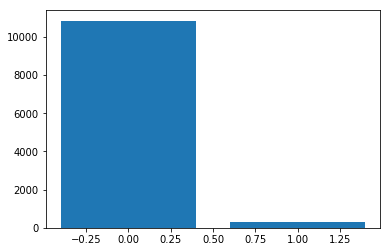

In [26]:
#frequency 
import matplotlib.pyplot as plt
from collections import Counter
class_freq = Counter(result1['class'])
print(class_freq)
plt.bar(class_freq.keys(), class_freq.values())

In [27]:
x_train = result1.drop(['id', 'class', 'seq', 'index'], 1)

#print(x_train)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

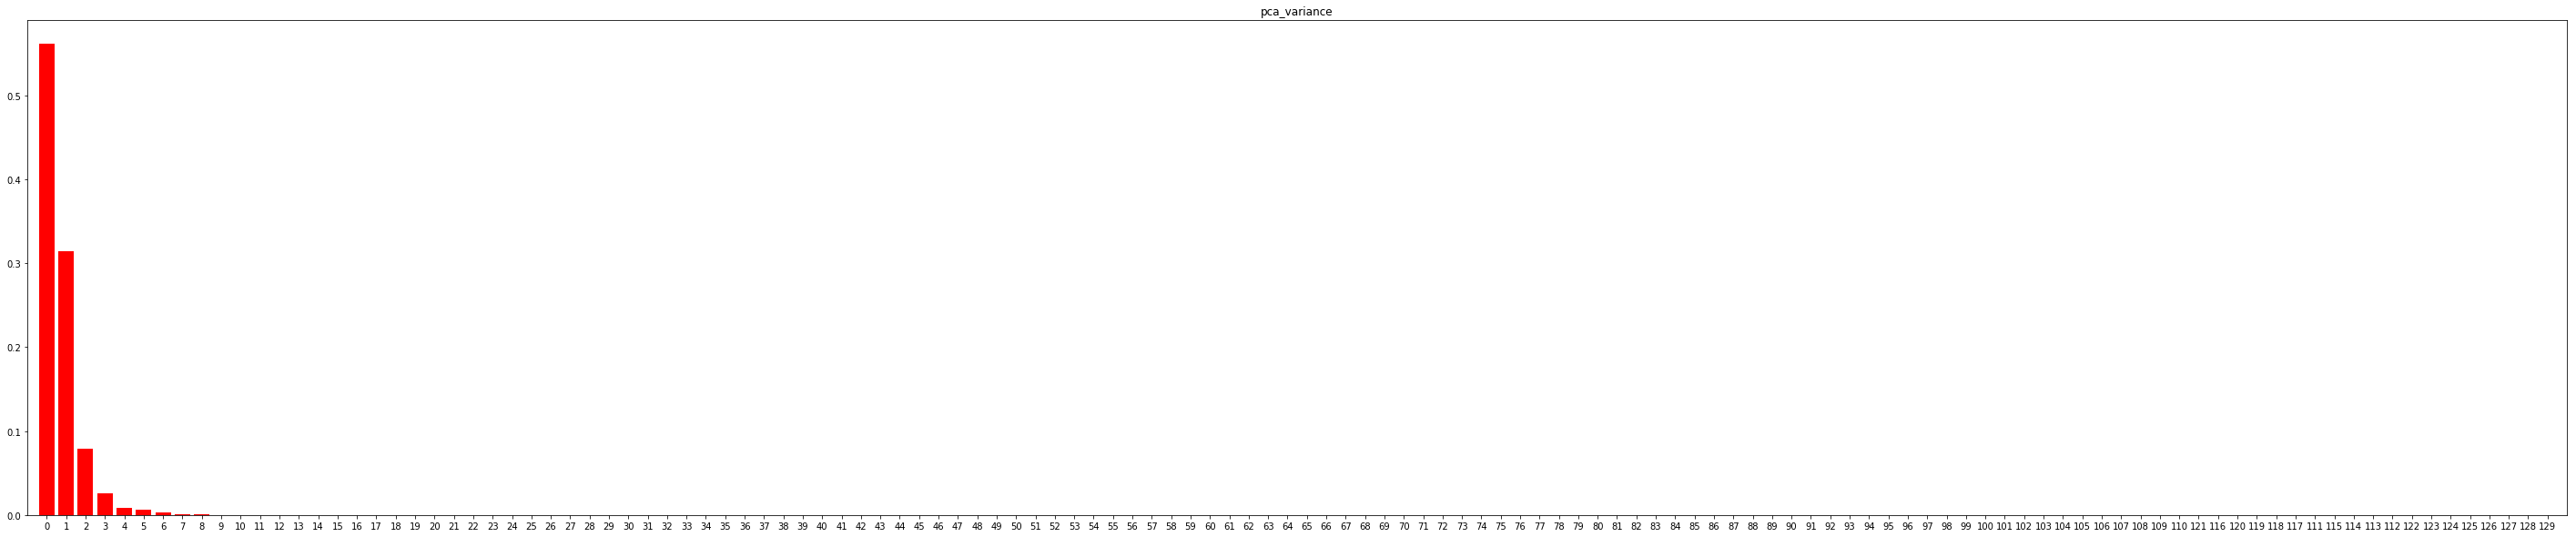

In [29]:
import numpy as np
import matplotlib.pyplot as plt
pca_var = pca.explained_variance_ratio_
indices = np.argsort(pca_var)[::-1]
plt.figure(figsize=(50,10))
plt.title('pca_variance')
plt.bar(range(x_train_pca.shape[1]),pca_var[indices], color ='r', align = 'center')
plt.xticks(range(x_train_pca.shape[1]), indices)
plt.xlim([-1, x_train_pca.shape[1]])
plt.show()

In [30]:
# contributionof different PCs to total variance
print(pca_var)

[5.61219411e-01 3.13978335e-01 7.93190405e-02 2.57703064e-02
 8.99015979e-03 6.60091796e-03 2.71603928e-03 5.67476932e-04
 3.42179307e-04 1.87276057e-04 1.41300520e-04 6.53146759e-05
 2.97226628e-05 2.88995766e-05 2.16672363e-05 1.14317702e-05
 4.37978370e-06 3.68538100e-06 2.45647521e-06 4.39130858e-26
 2.89213283e-26 2.64164542e-27 1.45294954e-27 4.38621794e-28
 2.07016911e-28 9.55477868e-29 6.27247218e-29 2.89928770e-29
 2.04308341e-29 1.49308413e-29 1.40467736e-29 1.01268772e-29
 6.72813168e-30 6.27553005e-30 4.43991928e-30 4.16852396e-30
 3.63933702e-30 3.05858914e-30 2.37633568e-30 1.75653454e-30
 1.54682755e-30 1.30261837e-30 1.04502811e-30 9.02852763e-31
 8.20492475e-31 6.89589657e-31 4.71340771e-31 4.68773391e-31
 4.42724052e-31 3.73524035e-31 3.23833783e-31 2.84835882e-31
 2.76710085e-31 2.56008169e-31 2.14967844e-31 1.99181923e-31
 1.70866059e-31 1.62867471e-31 1.53122398e-31 1.31898789e-31
 1.21323433e-31 1.17471997e-31 1.08944732e-31 1.02319986e-31
 9.06264822e-32 7.867256

In [32]:
# print components relation with features
print(pd.DataFrame(pca.components_, columns = x_train.columns))

## check if there is any command to check which features contribute the most to the 1st 3 PCs 

           K0        Ht        Hp         P       pHi        pK        Mw  \
0    0.001425 -0.001174 -0.001117  0.000170  0.000518  0.000831 -0.000308   
1   -0.002919  0.001929 -0.000267  0.001804  0.000600 -0.000674  0.002424   
2   -0.000137  0.000683 -0.001165  0.000186  0.000462 -0.002289 -0.000822   
3   -0.003215 -0.000368  0.001478 -0.003353 -0.001369 -0.000862 -0.000999   
4    0.002636  0.000965 -0.001116  0.001726  0.002002  0.005456 -0.000923   
..        ...       ...       ...       ...       ...       ...       ...   
125 -0.000000  0.060240  0.017380 -0.112181  0.002220  0.012383 -0.171351   
126 -0.000000  0.174760 -0.220297 -0.158319  0.134620  0.026711 -0.038277   
127 -0.000000  0.166999  0.036878  0.001944  0.110581  0.028696 -0.160480   
128  0.000000  0.046008 -0.114795 -0.052181 -0.033874  0.036519  0.138638   
129 -0.000000  0.012019 -0.045123  0.002870  0.083046 -0.021732 -0.032142   

           Bl        Rf        Mu  ...  MIYS990101  FASG890101  DAYM780201 

In [33]:
# see if 3 PCs can be used to segregate the data

y_train = result1[['class']]

pca = PCA(n_components=3)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

In [35]:
principalDF = pd.DataFrame(data=x_train_pca, columns= ['PC1','PC2','PC3'])
principalDF = pd.concat([principalDF,y_train],axis=1)
principalDF

,PC1,PC2,PC3,class
0,7.093042,17.489782,-5.527606,0
1,48.629435,31.198320,-18.664170,0
2,33.001682,32.543552,-13.418293,0
3,37.844584,35.999959,-9.210942,0
4,41.724797,36.931583,-6.800881,0
...,...,...,...,...
11134,-3.756871,2.049747,0.310057,0
11135,-3.756905,2.050164,0.312051,0
11136,-3.739563,2.051999,0.314828,0
11137,-3.739459,2.050285,0.315921,0


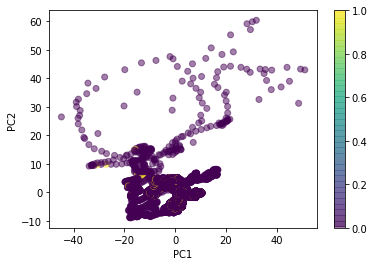

In [36]:
plt.scatter(principalDF['PC1'], principalDF['PC2'], alpha=0.5, c=principalDF['class'], cmap='viridis' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [37]:
len(principalDF)

11139

In [38]:
principalDF.to_csv("../physico_chem/pca_df.csv", index=False)
result1.to_csv("../physico_chem/master_data_physicochem_prop.csv", index=False)

# to Do
from the master data
1. create train & test split by uniprot id
2. fit pca on the train set (on features alone ie x_train) - apply the transform to both train & test sets
3. from the pca-transformed train set, segregate pos & negative data (check feasibility) - then split into 38 random subsets for ensemble learning

In [ ]:
pca = PCA(n_components=3) #decomposition.PCA(n_components = 3)  
# n_components = N; n_components should be <= no. of features

pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

In [35]:
f1= open("../physico_chem/pos_neg_seq.csv","w+")
for seq in pos_neg[1] :
    print(seq)
    f1.write(str(seq) + '\n')

 KRMLSFQGL 
 QEAIEHYRH 
 LFNTKQYTM 
 FNTKQYTME 
 NTKQYTMEL 
 TKQYTMELE 
 KQYTMELER 
 QYTMELERL 
 YTMELERLY 
 TMELERLYL 
 MELERLYLQ 
 ELERLYLQM 
 EAIEHYRHA 
 LERLYLQMW 
 ERLYLQMWE 
 RLYLQMWEH 
 LYLQMWEHY 
 YLQMWEHYA 
 LQMWEHYAA 
 QMWEHYAAG 
 MWEHYAAGN 
 WEHYAAGNK 
 EHYAAGNKP 
 AIEHYRHAL 
 HYAAGNKPD 
 YAAGNKPDH 
 AAGNKPDHM 
 AGNKPDHMI 
 GNKPDHMIK 
 NKPDHMIKP 
 KPDHMIKPV 
 PDHMIKPVE 
 DHMIKPVEV 
 HMIKPVEVT 
 IEHYRHALR 
 MIKPVEVTE 
 IKPVEVTES 
 EHYRHALRL 
 HYRHALRLK 
 YRHALRLKP 
 RHALRLKPD 
 HALRLKPDF 
 ALRLKPDFI 
 RMLSFQGLA 
 LRLKPDFID 
 RLKPDFIDG 
 LKPDFIDGY 
 KPDFIDGYI 
 PDFIDGYIN 
 DFIDGYINL 
 FIDGYINLA 
 IDGYINLAA 
 DGYINLAAA 
 GYINLAAAL 
 MLSFQGLAE 
 YINLAAALV 
 INLAAALVA 
 NLAAALVAA 
 LAAALVAAG 
 AAALVAAGD 
 AALVAAGDM 
 ALVAAGDME 
 LVAAGDMEG 
 VAAGDMEGA 
 AAGDMEGAV 
 LSFQGLAEL 
 AGDMEGAVQ 
 GDMEGAVQA 
 DMEGAVQAY 
 MEGAVQAYV 
 EGAVQAYVS 
 GAVQAYVSA 
 AVQAYVSAL 
 VQAYVSALQ 
 QAYVSALQY 
 AYVSALQYN 
 SFQGLAELA 
 YVSALQYNP 
 VSALQYNPD 
 SALQYNPDL 
 ALQYNPDLY 
 LQYNPDLYC 
 QYNPDLYCV 
 YNP

 LVSCRRCAV 
 VSCRRCAVV 
 SCRRCAVVG 
 CRRCAVVGN 
 RRCAVVGNS 
 RCAVVGNSG 
 CAVVGNSGN 
 KLLTLLVLF 
 AVVGNSGNL 
 VVGNSGNLK 
 VGNSGNLKE 
 GNSGNLKES 
 NSGNLKESY 
 SGNLKESYY 
 GNLKESYYG 
 NLKESYYGP 
 LKESYYGPQ 
 KESYYGPQI 
 LLTLLVLFI 
 ESYYGPQID 
 SYYGPQIDS 
 YYGPQIDSH 
 YGPQIDSHD 
 GPQIDSHDF 
 PQIDSHDFV 
 QIDSHDFVL 
 IDSHDFVLR 
 DSHDFVLRM 
 SHDFVLRMN 
 LTLLVLFIF 
 HDFVLRMNK 
 DFVLRMNKA 
 FVLRMNKAP 
 VLRMNKAPT 
 LRMNKAPTE 
 RMNKAPTEG 
 MNKAPTEGF 
 NKAPTEGFE 
 KAPTEGFEA 
 APTEGFEAD 
 TLLVLFIFL 
 PTEGFEADV 
 TEGFEADVG 
 EGFEADVGS 
 GFEADVGSK 
 FEADVGSKT 
 EADVGSKTT 
 ADVGSKTTH 
 DVGSKTTHH 
 VGSKTTHHF 
 GSKTTHHFV 
 LLVLFIFLT 
 SKTTHHFVY 
 KTTHHFVYP 
 TTHHFVYPE 
 THHFVYPES 
 HHFVYPESF 
 HFVYPESFR 
 FVYPESFRE 
 VYPESFREL 
 YPESFRELA 
 PESFRELAQ 
 LVLFIFLTS 
 ESFRELAQE 
 SFRELAQEV 
 FRELAQEVS 
 RELAQEVSM 
 ELAQEVSMI 
 LAQEVSMIL 
 AQEVSMILV 
 QEVSMILVP 
 EVSMILVPF 
 VSMILVPFK 
 VLFIFLTSF 
 SMILVPFKT 
 MILVPFKTT 
 ILVPFKTTD 
 LVPFKTTDL 
 VPFKTTDLE 
 PFKTTDLEW 
 FKTTDLEWV 
 KTTDLEWVI 
 TTDLEWVIS 
 TDL

 DISGKEAIS 
 ISGKEAISA 
 SGKEAISAL 
 GKEAISALS 
 KEAISALSR 
 EAISALSRA 
 AISALSRAK 
 ISALSRAKS 
 TVLLLQTLV 
 SALSRAKSK 
 ALSRAKSKH 
 LSRAKSKHC 
 SRAKSKHCR 
 RAKSKHCRQ 
 AKSKHCRQE 
 KSKHCRQEI 
 SKHCRQEIG 
 KHCRQEIGE 
 HCRQEIGET 
 VLLLQTLVV 
 CRQEIGETY 
 RQEIGETYC 
 QEIGETYCR 
 EIGETYCRH 
 IGETYCRHK 
 GETYCRHKL 
 ETYCRHKLG 
 TYCRHKLGL 
 YCRHKLGLL 
 CRHKLGLLM 
 LLLQTLVVW 
 RHKLGLLMP 
 HKLGLLMPE 
 KLGLLMPEK 
 LGLLMPEKV 
 GLLMPEKVT 
 LLMPEKVTR 
 LMPEKVTRF 
 MPEKVTRFC 
 PEKVTRFCP 
 EKVTRFCPL 
 LLQTLVVWN 
 KVTRFCPLE 
 VTRFCPLEG 
 TRFCPLEGK 
 RFCPLEGKA 
 FCPLEGKAN 
 CPLEGKANK 
 PLEGKANKN 
 LEGKANKNV 
 EGKANKNVQ 
 GKANKNVQW 
 LQTLVVWNF 
 KANKNVQWD 
 ANKNVQWDE 
 NKNVQWDED 
 KNVQWDEDS 
 NVQWDEDSV 
 VQWDEDSVE 
 QWDEDSVEY 
 WDEDSVEYM 
 DEDSVEYMP 
 EDSVEYMPA 
 QTLVVWNFS 
 DSVEYMPAN 
 SVEYMPANP 
 VEYMPANPV 
 EYMPANPVR 
 YMPANPVRI 
 MPANPVRIA 
 PANPVRIAF 
 ANPVRIAFV 
 NPVRIAFVL 
 PVRIAFVLV 
 TLVVWNFSS 
 VRIAFVLVV 
 RIAFVLVVH 
 IAFVLVVHG 
 AFVLVVHGR 
 FVLVVHGRA 
 VLVVHGRAS 
 LVVHGRASR 
 VVHGRASRQ 
 VHG

 FGDYPVERC 
 GDYPVERCL 
 DYPVERCLR 
 YPVERCLRQ 
 PVERCLRQM 
 VERCLRQMD 
 ERCLRQMDR 
 RCLRQMDRA 
 CLRQMDRAF 
 RGTIGAGKF 
 LRQMDRAFN 
 RQMDRAFNF 
 QMDRAFNFG 
 MDRAFNFGD 
 DRAFNFGDN 
 RAFNFGDNQ 
 AFNFGDNQI 
 FNFGDNQIL 
 NFGDNQILQ 
 FGDNQILQM 
 GTIGAGKFG 
 GDNQILQMY 
 DNQILQMYG 
 NQILQMYGF 
 QILQMYGFT 
 ILQMYGFTH 
 LQMYGFTHK 
 QMYGFTHKS 
 MYGFTHKSL 
 YGFTHKSLG 
 GFTHKSLGS 
 TIGAGKFGT 
 FTHKSLGSR 
 THKSLGSRR 
 HKSLGSRRV 
 KSLGSRRVK 
 SLGSRRVKP 
 LGSRRVKPT 
 GSRRVKPTR 
 SRRVKPTRN 
 RRVKPTRNQ 
 RVKPTRNQT 
 IGAGKFGTP 
 VKPTRNQTD 
 KPTRNQTDR 
 PTRNQTDRP 
 TRNQTDRPL 
 RNQTDRPLD 
 NQTDRPLDA 
 QTDRPLDAK 
 TDRPLDAKD 
 DRPLDAKDE 
 RPLDAKDEF 
 GAGKFGTPE 
 PLDAKDEFG 
 LDAKDEFGL 
 DAKDEFGLL 
 AKDEFGLLH 
 KDEFGLLHP 
 DEFGLLHPP 
 EFGLLHPPF 
 FGLLHPPFK 
 GLLHPPFKA 
 LLHPPFKAA 
 AGKFGTPEK 
 LHPPFKAAK 
 HPPFKAAKL 
 PPFKAAKLS 
 PFKAAKLST 
 FKAAKLSTT 
 KAAKLSTTT 
 GKFGTPEKD 
 KFGTPEKDI 
 FGTPEKDIE 
 GTPEKDIEE 
 MIEKCIGAH 
 TPEKDIEEI 
 PEKDIEEIR 
 EKDIEEIRE 
 KDIEEIREH 
 DIEEIREHF 
 IEEIREHFF 
 EEIREHFFY 
 EIR

In [25]:
#segregate the data as train and test (80/20)
import numpy as np
seq = pd.read_csv('../seq_id.txt', header = None)
print(seq)
#print(seq[0])
np.random.seed(25)
train, test = np.split(seq.sample(frac=1), [int(.8*len(seq))])
print(train)
print(test)

         0
0   P16442
1   P15291
2   Q9VBZ9
3   Q3U4G3
4   Q8WZA1
5   Q09324
6   Q86Y38
7   Q10469
8   Q09328
9   Q92410
10  Q10471
11  Q8N4A0
12  Q02745
13  P15907
14  O43173
15  Q9LZJ3
16  Q9SWH5
17  O15294
18  Q9LAK3
19  Q9P2W7
20  O94766
21  Q9ES89
22  Q91ZW2
23  Q9Y2G5
24  Q8NBL1
         0
2   Q9VBZ9
9   Q92410
17  O15294
10  Q10471
21  Q9ES89
13  P15907
0   P16442
6   Q86Y38
16  Q9SWH5
11  Q8N4A0
20  O94766
14  O43173
23  Q9Y2G5
19  Q9P2W7
3   Q3U4G3
7   Q10469
1   P15291
5   Q09324
24  Q8NBL1
8   Q09328
         0
18  Q9LAK3
12  Q02745
22  Q91ZW2
15  Q9LZJ3
4   Q8WZA1


In [25]:
positive = []
negative = []
for key in sorted(binding_res.keys()) :
    if binding_res[key] == 1 :
        positive.append(str(fragment[key]))
    else :
        negative.append(str(fragment[key]))

KeyError: 'Q9LAK3_2'

In [6]:
for key in sorted(binding_res.keys()) :
    print(key)

O15294_10
O15294_100
O15294_1000
O15294_1001
O15294_1002
O15294_1003
O15294_1004
O15294_1005
O15294_1006
O15294_1007
O15294_1008
O15294_1009
O15294_101
O15294_1010
O15294_1011
O15294_1012
O15294_1013
O15294_1014
O15294_1015
O15294_1016
O15294_1017
O15294_1018
O15294_1019
O15294_102
O15294_1020
O15294_1021
O15294_1022
O15294_1023
O15294_1024
O15294_1025
O15294_1026
O15294_1027
O15294_1028
O15294_1029
O15294_103
O15294_1030
O15294_1031
O15294_104
O15294_105
O15294_106
O15294_107
O15294_108
O15294_109
O15294_11
O15294_110
O15294_111
O15294_112
O15294_113
O15294_114
O15294_115
O15294_116
O15294_117
O15294_118
O15294_119
O15294_12
O15294_120
O15294_121
O15294_122
O15294_123
O15294_124
O15294_125
O15294_126
O15294_127
O15294_128
O15294_129
O15294_13
O15294_130
O15294_131
O15294_132
O15294_133
O15294_134
O15294_135
O15294_136
O15294_137
O15294_138
O15294_139
O15294_14
O15294_140
O15294_141
O15294_142
O15294_143
O15294_144
O15294_145
O15294_146
O15294_147
O15294_148
O15294_149
O15294_15
O15294

P16442_49
P16442_5
P16442_50
P16442_51
P16442_52
P16442_53
P16442_54
P16442_55
P16442_56
P16442_57
P16442_58
P16442_59
P16442_6
P16442_60
P16442_61
P16442_62
P16442_63
P16442_64
P16442_65
P16442_66
P16442_67
P16442_68
P16442_69
P16442_7
P16442_70
P16442_71
P16442_72
P16442_73
P16442_74
P16442_75
P16442_76
P16442_77
P16442_78
P16442_79
P16442_8
P16442_80
P16442_81
P16442_82
P16442_83
P16442_84
P16442_85
P16442_86
P16442_87
P16442_88
P16442_89
P16442_9
P16442_90
P16442_91
P16442_92
P16442_93
P16442_94
P16442_95
P16442_96
P16442_97
P16442_98
P16442_99
Q02745_10
Q02745_100
Q02745_101
Q02745_102
Q02745_103
Q02745_104
Q02745_105
Q02745_106
Q02745_107
Q02745_108
Q02745_109
Q02745_11
Q02745_110
Q02745_111
Q02745_112
Q02745_113
Q02745_114
Q02745_115
Q02745_116
Q02745_117
Q02745_118
Q02745_119
Q02745_12
Q02745_120
Q02745_121
Q02745_122
Q02745_123
Q02745_124
Q02745_125
Q02745_126
Q02745_127
Q02745_128
Q02745_129
Q02745_13
Q02745_130
Q02745_131
Q02745_132
Q02745_133
Q02745_134
Q02745_135
Q02745_13

Q86Y38_169
Q86Y38_17
Q86Y38_170
Q86Y38_171
Q86Y38_172
Q86Y38_173
Q86Y38_174
Q86Y38_175
Q86Y38_176
Q86Y38_177
Q86Y38_178
Q86Y38_179
Q86Y38_18
Q86Y38_180
Q86Y38_181
Q86Y38_182
Q86Y38_183
Q86Y38_184
Q86Y38_185
Q86Y38_186
Q86Y38_187
Q86Y38_188
Q86Y38_189
Q86Y38_19
Q86Y38_190
Q86Y38_191
Q86Y38_192
Q86Y38_193
Q86Y38_194
Q86Y38_195
Q86Y38_196
Q86Y38_197
Q86Y38_198
Q86Y38_199
Q86Y38_20
Q86Y38_200
Q86Y38_201
Q86Y38_202
Q86Y38_203
Q86Y38_204
Q86Y38_205
Q86Y38_206
Q86Y38_207
Q86Y38_208
Q86Y38_209
Q86Y38_21
Q86Y38_210
Q86Y38_211
Q86Y38_212
Q86Y38_213
Q86Y38_214
Q86Y38_215
Q86Y38_216
Q86Y38_217
Q86Y38_218
Q86Y38_219
Q86Y38_22
Q86Y38_220
Q86Y38_221
Q86Y38_222
Q86Y38_223
Q86Y38_224
Q86Y38_225
Q86Y38_226
Q86Y38_227
Q86Y38_228
Q86Y38_229
Q86Y38_23
Q86Y38_230
Q86Y38_231
Q86Y38_232
Q86Y38_233
Q86Y38_234
Q86Y38_235
Q86Y38_236
Q86Y38_237
Q86Y38_238
Q86Y38_239
Q86Y38_24
Q86Y38_240
Q86Y38_241
Q86Y38_242
Q86Y38_243
Q86Y38_244
Q86Y38_245
Q86Y38_246
Q86Y38_247
Q86Y38_248
Q86Y38_249
Q86Y38_25
Q86Y38_250
Q86Y38_2

Q9ES89_239
Q9ES89_24
Q9ES89_240
Q9ES89_241
Q9ES89_242
Q9ES89_243
Q9ES89_244
Q9ES89_245
Q9ES89_246
Q9ES89_247
Q9ES89_248
Q9ES89_249
Q9ES89_25
Q9ES89_250
Q9ES89_251
Q9ES89_252
Q9ES89_253
Q9ES89_254
Q9ES89_255
Q9ES89_256
Q9ES89_257
Q9ES89_258
Q9ES89_259
Q9ES89_26
Q9ES89_260
Q9ES89_261
Q9ES89_262
Q9ES89_263
Q9ES89_264
Q9ES89_265
Q9ES89_266
Q9ES89_267
Q9ES89_268
Q9ES89_269
Q9ES89_27
Q9ES89_270
Q9ES89_271
Q9ES89_272
Q9ES89_273
Q9ES89_274
Q9ES89_275
Q9ES89_276
Q9ES89_277
Q9ES89_278
Q9ES89_279
Q9ES89_28
Q9ES89_280
Q9ES89_281
Q9ES89_282
Q9ES89_283
Q9ES89_284
Q9ES89_285
Q9ES89_286
Q9ES89_287
Q9ES89_288
Q9ES89_289
Q9ES89_29
Q9ES89_290
Q9ES89_291
Q9ES89_292
Q9ES89_293
Q9ES89_294
Q9ES89_295
Q9ES89_296
Q9ES89_297
Q9ES89_298
Q9ES89_299
Q9ES89_30
Q9ES89_300
Q9ES89_301
Q9ES89_302
Q9ES89_303
Q9ES89_304
Q9ES89_305
Q9ES89_306
Q9ES89_307
Q9ES89_308
Q9ES89_309
Q9ES89_31
Q9ES89_310
Q9ES89_311
Q9ES89_312
Q9ES89_313
Q9ES89_314
Q9ES89_315
Q9ES89_316
Q9ES89_317
Q9ES89_318
Q9ES89_319
Q9ES89_32
Q9ES89_320
Q9ES89_3

In [1]:
import os
import pandas as pd
from collections import Counter

result = pd.read_csv("../physico_chem/pca_df.csv")
result.head(2)

,PC1,PC2,PC3,class
0,7.093042,17.489782,-5.527606,0
1,48.629435,31.198320,-18.664170,0


In [2]:
10849/290

37.41034482758621

/home/ansuman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PC1,PC2,PC3,class,train_index
0,7.093042,17.489782,-5.527606,0,35
1,48.629435,31.198320,-18.664170,0,19
2,33.001682,32.543552,-13.418293,0,2
3,37.844584,35.999959,-9.210942,0,14
4,41.724797,36.931583,-6.800881,0,17
5,45.022003,38.923606,-5.109037,0,4
6,51.077231,42.911568,-5.543555,0,26
7,49.398797,43.184431,-8.009512,0,25
8,44.056413,43.798012,-11.558036,0,9
9,38.021718,42.835184,-13.847638,0,6


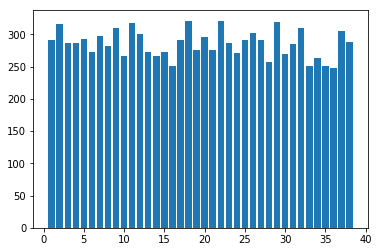

In [6]:
##split the training data
from collections import Counter
import matplotlib.pyplot as plt
import random


result_train_positive = result[result['class'] == 1]
result_train_negative = result[result['class'] == 0]


#segregate the negative training data into 40 parts


#for negative in range(40) :
#    first_split + str(negative) = result_train_positive.sample(frac=0.025,random_state=200)
#    print(first_split + str(negative))
#    first_split_remove + str(negative+1) = result_train_positive.drop((first_split + str(negative)).index)
#    second_split = (first_split_remove + + str(negative+1)).sample(frac=0.025,random_state=200)
#    print(second_split)


mylist = []
random.seed(30)

for number in range(0, len(result_train_negative)): #9471):
    #np.random.seed(30)
    
    x = random.randint(1,38)
    mylist.append(x)

#distribution of random number

random_number = pd.DataFrame(mylist,columns=['train_index'])

random_freq = Counter(random_number['train_index'])
#print(random_freq)
plt.bar(random_freq.keys(), random_freq.values())

# join the 2 dataframes by the id coplumn (pssm and positive negative values)

result_train_negative['train_index'] = mylist 

result_train_negative.head(10)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
svm = SVC(class_weight="balanced", gamma="scale")
mean_cv1 = []


for iteration_1 in range(1,39):
    print('')
    print(iteration_1)
    
    result_train_negative_x1 = result_train_negative[result_train_negative['train_index'] == iteration_1]
    frames1 = [result_train_positive, result_train_negative_x1.drop(['train_index'], axis = 1)]
    df935_train1 = pd.concat(frames1)
    
    y_train1 = df935_train1['class'].values
    X_train1 = df935_train1.drop(['class'], axis = 1)
    
    svm.fit(X_train1,y_train1)
    cv = StratifiedKFold(n_splits=5, random_state=0)
    cv_scores1 = cross_val_score(svm, X_train1, y_train1, cv=cv, scoring="balanced_accuracy")
    mean_cv1.append(np.mean(cv_scores1))
    
    y_pred1 = svm.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred1))
    print(classification_report(y_test, y_pred1))
    print(cv_scores1)
    print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores1)))